# Correlation and Regression Analysis

Prerequisites:
- Familiarity with previous notebooks such as:
    - Descriptive Statistics.
    - Elementary Statistical Testing.
- Python Libraries such as:
    - Numpy
    - Scipy
    - Sklearn
    - Statsmodels
    - Pandas

## Correlation
Correlation is a statistical measure that expresses the extent to which two variables are linearly related. It quantifies the degree to which changes in one variable are associated with changes in another. It's used to understand the relationship between two variables by:

- Measuring the two variables.
- Plotting the measurements.

The way to measure the correlation is by quantifying using the correlation coefficient and then pick a suitable method to follow for the measurement.
- **Correlation Coefficient**: A numerical value (ranging from -1 to +1) that indicates the strength and direction of the relationship:
  - **+1**: Perfect positive correlation (as one variable increases, the other also increases).
  - **-1**: Perfect negative correlation (as one variable increases, the other decreases).
  - **0**: No correlation (no predictable relationship).

Common methods to use are:

**1. Person Correlation.**

**2. Spearman Correlation.**

### **1. Pearson Correlation**

This method able us to determine if a linear relationship between two variables exist.

- **Assumption**: It's only used if the the samples were **normally distributed**.

If that wasn't the case we can't use it and we opt to another method with doesn't need to satisfy this condition.

- **Formula**:
$$r = \frac{n(\sum xy) - (\sum x)(\sum y)}{\sqrt{[n \sum x^2 - (\sum x)^2][n \sum y^2 - (\sum y)^2]}}$$


Where:
- \( $r$ \) = Pearson correlation coefficient
- \( $n$ \) = number of data pairs
- \( $x$ \) and \( $y$ \) = the two variables being compared

- **Code**:

In [1]:
import numpy as np
from scipy.stats import pearsonr

# Example data
x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 6, 7, 8, 9])

# Calculate Pearson correlation
r, p_value = pearsonr(x, y)

print(f"Pearson correlation coefficient: {r}, p-value: {p_value}")


Pearson correlation coefficient: 1.0, p-value: 0.0


### **2. Spearman's Correlation**

Spearman correlation is a way to measure how strong and in what direction two variables are related, based on their ranks rather than their actual values. It's useful when the relationship isn't strictly linear.


- **Key Points**:

- **Rank-Based**: It converts data into ranks and then looks at how those ranks relate to each other.
  

- **When to Use**: Spearman is great when:
  - Your data isn’t normally distributed.
  - You have ordinal data (like rankings).
  - You want to avoid the influence of outliers.

- **Formula**: 
  $$
  \rho = 1 - \frac{6 \sum d^2}{n(n^2 - 1)}
  $$
  Where:
  - \( d \) is the difference in ranks for each pair of values.
  - \( n \) is the number of observations.

- **Important Considerations**:

  - **Non-parametric**: It doesn’t assume your data follows a normal distribution.
  - **Monotonic Relationships**: It can handle relationships that consistently go up or down, even if they aren't perfectly straight.
  - **Special Case**: In comparing between a binary variable and a continous variable we use **Point-biserial Correlation** which is a special case of Spearman's Correlation.

- **Code:**

In [ ]:
import numpy as np
from scipy.stats import spearmanr

# Example data
x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 6, 7, 8, 7])

# Calculate Spearman correlation
rho, p_value = spearmanr(x, y)

print(f"Spearman correlation coefficient: {rho}, p-value: {p_value}")


### **3. Kendall’s Tau-a**

- **Purpose**: To measure the strength and direction of association between two ranked variables, providing a non-parametric alternative to Pearson's and Spearman's correlation.
- **Example**: Assessing the relationship between rankings of two different judges on a set of performances.
- **Formula**:
  $$
  \tau_a = \frac{C - D}{\frac{1}{2} n(n - 1)} = \frac{C - D}{C + D}
  $$
  Where \(C\) is the number of concordant pairs, \(D\) is the number of discordant pairs, and \(n\) is the number of observations.
  
Kendall's Tau-a is particularly useful for ordinal data or non-normally distributed continuous data, making it robust against outliers and ties.

It's preferrable used over Spearman's Correlation due to being more efficient in the case of **very few data samples with many rank ties**.

In [2]:
import numpy as np
from scipy.stats import kendalltau

# Example data
x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 6, 7, 8, 7])

# Calculate Kendall's Tau
tau, p_value = kendalltau(x, y)

print(f"Kendall's Tau-a: {tau}, p-value: {p_value}")

Kendall's Tau-a: 0.7378647873726218, p-value: 0.07697417298126674


## Linear Regression

Regression is a statistical method used to model and analyze the relationship between a dependent variable and one or more independent variables. It helps in understanding how the dependent variable changes when the independent variables change.

Correlation also helps us to understand the relationship between features but Regression's main goal is to model the relationship so we can predict an output and identify the relationship based on independent values.

 - **Simple Linear Regression**: Involves one independent variable and one dependent variable. The relationship is modeled using a straight line.
    - **Equation**: 
      $$
      Y = a + bX + \epsilon
      $$
      Where:
      - \( Y \) = dependent variable
      - \( X \) = independent variable
      - \( a \) = intercept (value of \( Y \) when \( X = 0 \))
      - \( b \) = slope (change in \( Y \) for a one-unit change in \( X \))
      - \( \epsilon \) = error term (the difference between the observed and predicted values)
      
  - **Assumptions**: Regression analysis assumes that:
    - There is a linear relationship between the dependent and independent variables.
    - The residuals (errors) are normally distributed.
    - The variance of residuals is constant (homoscedasticity).
    - Observations are independent.

After initializing and defining the model, we follow these steps:
- Choosing a Cost Function: Examples (Mean Squared Error, Absolute Error)
- Using Gradient Descent to find the best model that gives the lowest loss when it's trained on our data.
- Evaluation of the model using a metric: Examples (R-squared, RMSE)
- Making predictions and interpret the results.

- **Code**:

In [32]:
import pandas as pd
import statsmodels.api as sm

# Example data
data = {
    'X': [1, 2, 3, 4, 5],
    'Y': [2, 3, 5, 7, 11]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Define the independent and dependent variables
X = df['X']
y = df['Y']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Create the model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Summary of the regression
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     51.86
Date:                Sun, 22 Sep 2024   Prob (F-statistic):            0.00552
Time:                        01:05:58   Log-Likelihood:                -5.6451
No. Observations:                   5   AIC:                             15.29
Df Residuals:                       3   BIC:                             14.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0000      1.013     -0.987      0.3

C:\Users\mh_za\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [33]:
# Make predictions
y_pred = results.predict(X)

# Print predictions
for i in range(0,len(y_pred)): print("Real value:",y[i],"  Prediction: ",f"{y_pred[i]:.1f}")


Real value: 2   Prediction:  1.2
Real value: 3   Prediction:  3.4
Real value: 5   Prediction:  5.6
Real value: 7   Prediction:  7.8
Real value: 11   Prediction:  10.0


We can use Sci-kit Learn instead of statsmodels and scipy for LinearRegression too and it would be more suitable as it will allow us to utilize the powerful functions which the library includes.

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Example data
data = {
    'X': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Y': [2, 3, 5, 7, 11, 13, 14, 18, 19, 22]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Split the data into features (X) and target (y)
X = df[['X']]  # Features should be a 2D array
y = df['Y']    # Target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [30]:

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 0.26
R-squared: 1.00


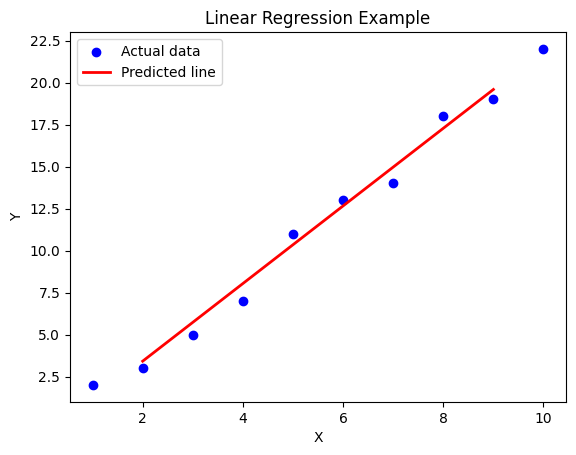

In [31]:
# Optional: Visualize the results
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Example')
plt.legend()
plt.show()


### Multiple Regression

**Definition**: Multiple regression is a statistical technique that models the relationship between one dependent variable and two or more independent variables. It extends simple linear regression, which only considers one predictor.

#### Key Points:

- **Purpose**: Multiple regression helps understand how the dependent variable changes when multiple independent variables vary. It is commonly used for prediction and determining the strength of predictors.

- **Model Equation**:
  The general form of a multiple regression model can be expressed as:
  $$
  Y = a + b_1X_1 + b_2X_2 + \ldots + b_nX_n + \epsilon
  $$
  Where:
  - \( $Y$ \) = dependent variable (target)
  - \( $a$ \) = intercept (the value of \( Y \) when all \( X \) are 0)
  - \( $b_1, b_2, \ldots, b_n$ \) = coefficients for each independent variable \( X_1, X_2, \ldots, X_n \)
  - \( $\epsilon$ \) = error term (the difference between observed and predicted values)

- **Assumptions**: Similar to simple linear regression, multiple regression has certain assumptions:
  - Linearity: The relationship between the dependent and independent variables is linear.
  - Independence: Observations are independent of each other.
  - Homoscedasticity: The variance of residuals is constant across all levels of the independent variables.
  - Normality: The residuals should be normally distributed.

- **Applications**: Multiple regression is widely used in various fields, including:
  - **Economics**: To predict consumer spending based on income, age, and other factors.
  - **Healthcare**: To assess how different treatments affect health outcomes.
  - **Social Sciences**: To study the impact of various demographic factors on behavior.

#### Benefits:

- **Comprehensive Analysis and More Predictive Power**: It allows researchers to examine multiple factors simultaneously, providing a more comprehensive view of the relationships among variables.

#### Limitations:

- **Overfitting**: Including too many variables can lead to a model that is overly complex and does not generalize well to new data.
- **Multicollinearity**: High correlation between independent variables can make it difficult to determine the individual effect of each variable.

In [45]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :3]  # Use the first three features (sepal length, sepal width, petal width)
y = iris.data[:, 2]    # Petal length as the target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multiple linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [46]:

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 0.00
R-squared: 1.00


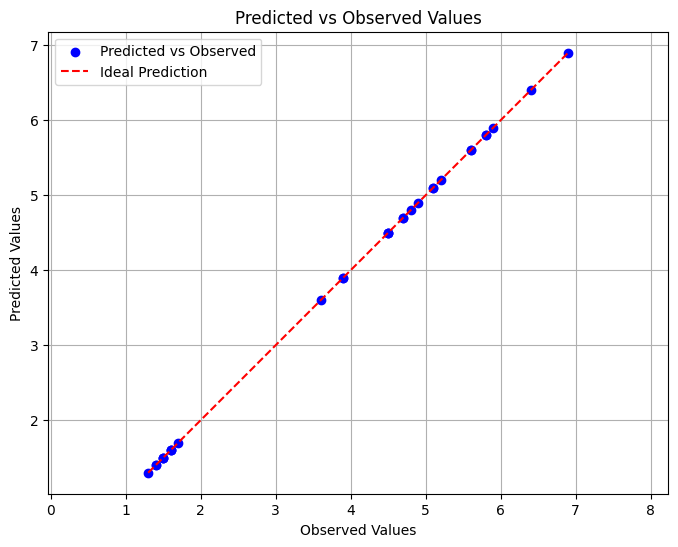

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Observed')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Observed Values')
plt.legend()
plt.grid()
plt.axis('equal')  # Equal scaling for both axes
plt.show()